In [1]:
import pandas as pd
import sqlite3
import string
con = sqlite3.connect("SalesData.db")

In [2]:
def executeQuery(query):
    df=pd.read_sql(query, con=con)
    return df

In [5]:
data = pd.read_sql_query("SELECT * from common_order", con)

In [10]:
data1 = pd.read_sql_query("SELECT * from common_order_line_item", con)

In [32]:
co=data.copy()

In [264]:
#col=data1.copy()

In [265]:
#col.drop(['arrival_date','cancelled','description','fulfillment_center','item_id','package_number','requires_shipping','ship_date','shipment_id','tax','title','unfulfillable','status','other_cost','refund','selling_cost'],axis=1,inplace=True)

In [39]:
col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 644815 entries, 0 to 644814
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   price            644815 non-null  float64
 1   quantity         644815 non-null  int64  
 2   sku              644815 non-null  object 
 3   common_order_id  644815 non-null  object 
 4   product_id       644815 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 24.6+ MB


In [42]:
co.drop(['currency','fulfillment_channel','lat','lon','order_id','order_status','product_category','product_name'],axis=1,inplace=True)

In [46]:
co.drop(['ship_address_two','ship_date','delivered_date','site','phone_number','ship_state','ship_postcode','ship_phone','ship_name','ship_email','ship_country','ship_city','ship_address','user_id'],inplace=True,axis=1)

In [48]:
co.drop(['shipping_price'],axis=1,inplace=True)

In [50]:
df=co.copy()

In [267]:
col

,price,quantity,sku,common_order_id,product_id
0,0.0,1,3 Slot White Frame (Clay),3906081,B01N5K0VLV
1,0.0,1,WhiteWalnut4,4223243,B06WLNK5ML
2,0.0,1,DELUXE frame White (Clay),3825580,B01NBP8UW1
3,0.0,1,White,3861001,B01FT95PK6
4,0.0,1,White,4207244,B01FT95PK6
...,...,...,...,...,...
644810,0.0,1,Slot White Frame (Ink),4410211,B01N9M7XEU
644811,0.0,1,WhiteWalnut4,4372146,B06WLNK5ML
644812,0.0,1,CT-KVG9-BV3Y,8983643,B01EOGDL10
644813,0.0,1,7pcLabeled,4744984,B01H0PQZHY


In [269]:
co

,market_place,price,product_id,purchase_date,quantity,region
0,None,NaN,B01N5K0VLV,2018-05-06 06:02:41,1,NorthAmerica
1,None,NaN,B06WLNK5ML,2018-03-15 22:29:28,1,NorthAmerica
2,None,NaN,B01NBP8UW1,2018-05-15 11:05:04,1,NorthAmerica
3,None,NaN,B01FT95PK6,2018-04-30 16:05:49,1,NorthAmerica
4,None,NaN,B01FT95PK6,2018-03-21 10:24:51,1,NorthAmerica
...,...,...,...,...,...,...
666680,ATVPDKIKX0DER,0.0,B01N9M7XEU,2018-02-20 15:45:31,1,NorthAmerica
666681,ATVPDKIKX0DER,0.0,B06WLNK5ML,2018-02-26 15:52:32,1,NorthAmerica
666682,ATVPDKIKX0DER,NaN,B01EOGDL10,2016-07-15 18:38:40,1,NorthAmerica
666683,ATVPDKIKX0DER,0.0,B01H0PQZHY,2017-12-29 20:04:08,1,NorthAmerica


In [52]:
df['purchase_date'] = df['purchase_date'].map(lambda s : s[:s.index(" ")])

In [53]:
df

,market_place,price,product_id,purchase_date,quantity,region
0,None,NaN,B01N5K0VLV,2018-05-06,1,NorthAmerica
1,None,NaN,B06WLNK5ML,2018-03-15,1,NorthAmerica
2,None,NaN,B01NBP8UW1,2018-05-15,1,NorthAmerica
3,None,NaN,B01FT95PK6,2018-04-30,1,NorthAmerica
4,None,NaN,B01FT95PK6,2018-03-21,1,NorthAmerica
...,...,...,...,...,...,...
666680,ATVPDKIKX0DER,0.0,B01N9M7XEU,2018-02-20,1,NorthAmerica
666681,ATVPDKIKX0DER,0.0,B06WLNK5ML,2018-02-26,1,NorthAmerica
666682,ATVPDKIKX0DER,NaN,B01EOGDL10,2016-07-15,1,NorthAmerica
666683,ATVPDKIKX0DER,0.0,B01H0PQZHY,2017-12-29,1,NorthAmerica


In [61]:
dff=df.copy()

In [55]:
dff.sort_values(by=['purchase_date'])

,market_place,price,product_id,purchase_date,quantity,region
106719,ATVPDKIKX0DER,101.00,B007TIE0GQ,2014-07-01,1,NorthAmerica
67578,A2EUQ1WTGCTBG2,NaN,B007TIE0GQ,2014-07-01,1,NorthAmerica
255234,ATVPDKIKX0DER,109.84,B007TIE0GQ,2014-07-01,1,NorthAmerica
28199,A2EUQ1WTGCTBG2,NaN,B007TIE0GQ,2014-07-01,1,NorthAmerica
77443,ATVPDKIKX0DER,101.00,B007TIE0GQ,2014-07-01,1,NorthAmerica
...,...,...,...,...,...,...
127042,ATVPDKIKX0DER,19.95,B01N5K0VLV,2019-06-13,1,NorthAmerica
591060,ATVPDKIKX0DER,39.95,B078SKDX2Y,2019-06-13,1,NorthAmerica
326503,ATVPDKIKX0DER,169.95,B01M0XGQO9,2019-06-13,1,NorthAmerica
650276,ATVPDKIKX0DER,0.00,B01HYX3UXY,2019-06-13,0,NorthAmerica


In [113]:
dff=dff.groupby(['purchase_date','product_id','market_place','region'],as_index=False).agg({'quantity': 'sum'})

In [124]:
dff

,purchase_date,product_id,market_place,region,quantity
0,2014-07-01,B007TIE0GQ,ATVPDKIKX0DER,NorthAmerica,5
1,2014-07-02,B007TIE0GQ,ATVPDKIKX0DER,NorthAmerica,2
2,2014-07-03,B005GK3IVW,ATVPDKIKX0DER,NorthAmerica,1
3,2014-07-03,B00AWLB09M,ATVPDKIKX0DER,NorthAmerica,1
4,2014-07-06,B005GK3IVW,ATVPDKIKX0DER,NorthAmerica,11
...,...,...,...,...,...
40088,2019-06-13,B07LGC7ZXY,ATVPDKIKX0DER,NorthAmerica,1
40089,2019-06-13,B07LGDJ6R6,ATVPDKIKX0DER,NorthAmerica,1
40090,2019-06-13,B07LGF24BF,ATVPDKIKX0DER,NorthAmerica,1
40091,2019-06-13,B07LGFMYB8,ATVPDKIKX0DER,NorthAmerica,1


In [135]:
n=int(0.2*len(dff))
n
l=len(dff)-n
l

32075

In [133]:
test= dff.tail(n)

In [137]:
train=dff.head(l)

In [138]:
melt_train=train.copy()

In [139]:
melt_train['sales_next_day'] = train.groupby("product_id")['quantity'].shift(-1)

In [144]:
melt_train

,purchase_date,product_id,market_place,region,quantity,sales_next_day
0,2014-07-01,B007TIE0GQ,ATVPDKIKX0DER,NorthAmerica,5,2.0
1,2014-07-02,B007TIE0GQ,ATVPDKIKX0DER,NorthAmerica,2,1.0
2,2014-07-03,B005GK3IVW,ATVPDKIKX0DER,NorthAmerica,1,11.0
3,2014-07-03,B00AWLB09M,ATVPDKIKX0DER,NorthAmerica,1,1.0
4,2014-07-06,B005GK3IVW,ATVPDKIKX0DER,NorthAmerica,11,1.0
...,...,...,...,...,...,...
32070,2019-02-11,B073J3VZCY,ATVPDKIKX0DER,NorthAmerica,5,0
32071,2019-02-11,B075JG2MVQ,ATVPDKIKX0DER,NorthAmerica,109,0
32072,2019-02-11,B075KGDZ2T,ATVPDKIKX0DER,NorthAmerica,10,0
32073,2019-02-11,B075NQR45W,ATVPDKIKX0DER,NorthAmerica,11,0


In [143]:
melt_train['sales_next_day']=melt_train['sales_next_day'].fillna('0')

In [171]:
dff

,purchase_date,product_id,market_place,region,quantity
0,2014-07-01,B007TIE0GQ,ATVPDKIKX0DER,NorthAmerica,5
1,2014-07-02,B007TIE0GQ,ATVPDKIKX0DER,NorthAmerica,2
2,2014-07-03,B005GK3IVW,ATVPDKIKX0DER,NorthAmerica,1
3,2014-07-03,B00AWLB09M,ATVPDKIKX0DER,NorthAmerica,1
4,2014-07-06,B005GK3IVW,ATVPDKIKX0DER,NorthAmerica,11
...,...,...,...,...,...
40088,2019-06-13,B07LGC7ZXY,ATVPDKIKX0DER,NorthAmerica,1
40089,2019-06-13,B07LGDJ6R6,ATVPDKIKX0DER,NorthAmerica,1
40090,2019-06-13,B07LGF24BF,ATVPDKIKX0DER,NorthAmerica,1
40091,2019-06-13,B07LGFMYB8,ATVPDKIKX0DER,NorthAmerica,1


sample

In [160]:
from darts import TimeSeries

In [109]:
d1=d1.groupby(['purchase_date','product_id'],as_index=False).agg({'quantity': 'sum'})

In [169]:
melt_train

,purchase_date,product_id,market_place,region,quantity,sales_next_day
0,2014-07-01,B007TIE0GQ,ATVPDKIKX0DER,NorthAmerica,5,2.0
1,2014-07-02,B007TIE0GQ,ATVPDKIKX0DER,NorthAmerica,2,1.0
2,2014-07-03,B005GK3IVW,ATVPDKIKX0DER,NorthAmerica,1,11.0
3,2014-07-03,B00AWLB09M,ATVPDKIKX0DER,NorthAmerica,1,1.0
4,2014-07-06,B005GK3IVW,ATVPDKIKX0DER,NorthAmerica,11,1.0
...,...,...,...,...,...,...
32070,2019-02-11,B073J3VZCY,ATVPDKIKX0DER,NorthAmerica,5,0
32071,2019-02-11,B075JG2MVQ,ATVPDKIKX0DER,NorthAmerica,109,0
32072,2019-02-11,B075KGDZ2T,ATVPDKIKX0DER,NorthAmerica,10,0
32073,2019-02-11,B075NQR45W,ATVPDKIKX0DER,NorthAmerica,11,0


In [111]:
d1=d1.loc[d1['product_id'] == 'B007TIE0GQ']

In [112]:
d1

,purchase_date,product_id,quantity
0,2014-07-01,B007TIE0GQ,5
1,2014-07-02,B007TIE0GQ,2
15,2014-07-13,B007TIE0GQ,1
132,2016-03-18,B007TIE0GQ,2
6505,2017-07-17,B007TIE0GQ,1
9658,2017-10-12,B007TIE0GQ,1
14536,2018-02-07,B007TIE0GQ,1


In [153]:
from darts.models.forecasting.block_rnn_model import *

In [166]:
product_keys=dff[dff['product_id'].isnull()==False]['product_id']
product_keys = list(set(list(product_keys)))

In [176]:
len(product_keys)
fill=float(0)

In [174]:
from tqdm import tqdm
from darts.utils.missing_values import fill_missing_values

In [195]:
data={}

In [208]:
trainable_series=[]
trainable_keys=[]
l=[]
for key in tqdm(product_keys):
    d1=dff.copy()
    d1=d1.loc[d1['product_id'] == key]
    d1=d1.groupby(['purchase_date','product_id'],as_index=False).agg({'quantity': 'sum'})
    series = TimeSeries.from_dataframe(d1,'purchase_date','quantity',freq='D')
    series=fill_missing_values(series,fill=fill)
    l=len(series)
    l=int(l)
    if l>=31:
        trainable_keys.append(key)
        trainable_series.append(series)
        data[key]=series
    #l_series = list(series)
    #print(len(l_series))
    #l.append(l_series)

100%|██████████| 128/128 [00:02<00:00, 58.59it/s]


In [188]:
l_series = list(series)

In [182]:
model = BlockRNNModel(input_chunk_length=10, 
                            output_chunk_length=1, 
                            n_rnn_layers=2)

#brnn_no_cov.fit(melt_train, epochs=100, verbose=True)

#eval_model(brnn_no_cov)

In [257]:
len(trainable_series)

111

In [209]:
k=0
for i in trainable_series:
    k=k+1
    if len(i)==1:
        print("False")
        print(k)


In [211]:
model.fit(trainable_series,verbose=True)

[2022-03-02 17:25:39,612] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 145188 samples.
[2022-03-02 17:25:39,612] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 145188 samples.
[2022-03-02 17:25:39,612] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 145188 samples.
[2022-03-02 17:25:39,612] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 145188 samples.
[2022-03-02 17:25:39,612] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 145188 samples.


  0%|          | 0/100 [00:00<?, ?it/s]

In [259]:
future_predictions = []
for i in trainable_series:
    series_to_forecast = i
    future = model.predict(n=50, series=i)
    future_predictions.append(future)
    

In [260]:
sales_forecast = pd.DataFrame(future_predictions)

In [263]:
sales_forecast

,0
0,"(((<TimeSeries (DataArray) (time: 1, component..."
1,"(((<TimeSeries (DataArray) (time: 1, component..."
2,"(((<TimeSeries (DataArray) (time: 1, component..."
3,"(((<TimeSeries (DataArray) (time: 1, component..."
4,"(((<TimeSeries (DataArray) (time: 1, component..."
...,...
106,"(((<TimeSeries (DataArray) (time: 1, component..."
107,"(((<TimeSeries (DataArray) (time: 1, component..."
108,"(((<TimeSeries (DataArray) (time: 1, component..."
109,"(((<TimeSeries (DataArray) (time: 1, component..."


In [219]:
series_to_forecast = trainable_series[7]

In [228]:
future = model.predict(n=500, series=series_to_forecast)

In [225]:
import matplotlib.pyplot as plt

In [256]:
#future

In [222]:
future

<TimeSeries (DataArray) (time: 5, component: 1, sample: 1)>
array([[[52.71206584]],

       [[68.19225987]],

       [[55.78906182]],

       [[58.838487  ]],

       [[52.42957599]]])
Coordinates:
  * time       (time) datetime64[ns] 2019-06-14 2019-06-15 ... 2019-06-18
  * component  (component) object 'quantity'
Dimensions without coordinates: sample

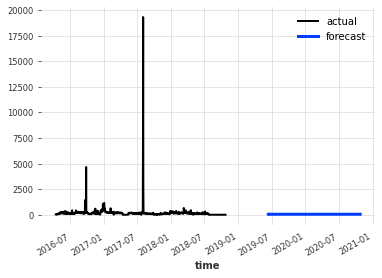

In [230]:
import matplotlib.pyplot as plt


series.plot(label='actual')
future.plot(label='forecast', lw=3)
plt.legend()

KeyboardInterrupt: 

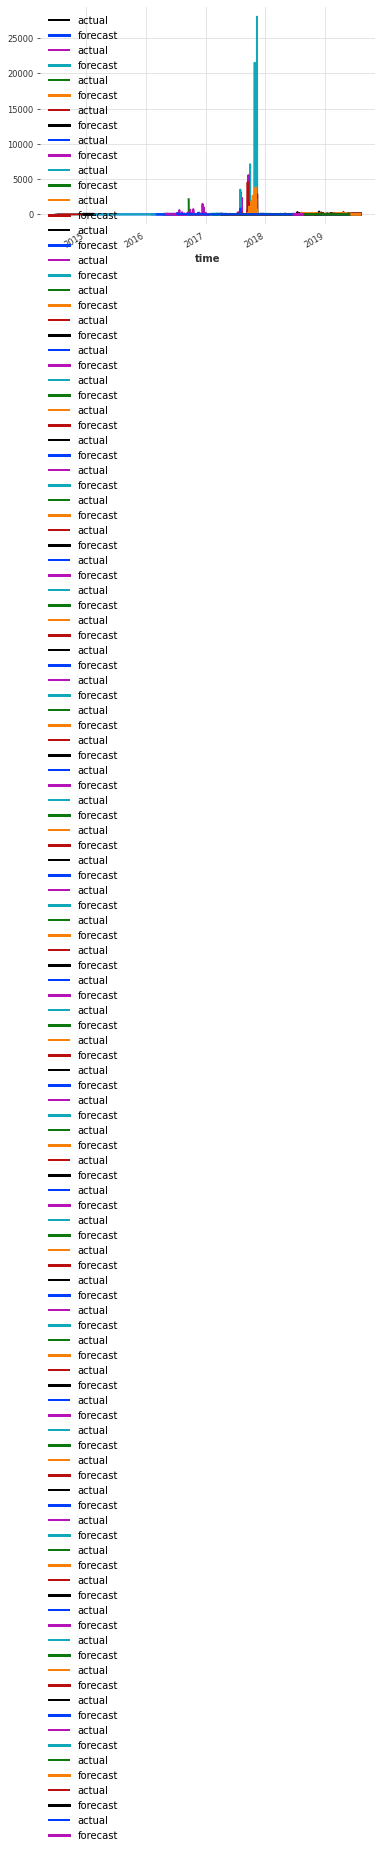

In [231]:
for i in trainable_series:
    series_to_forecast = i
    future = model.predict(n=50, series=i)
    i.plot(label='actual')
    future.plot(label='forecast', lw=3)
    plt.legend()

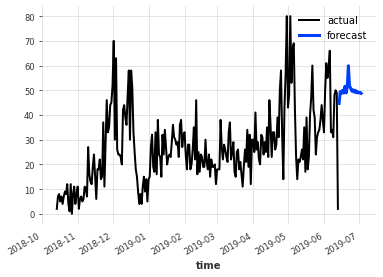

In [254]:
i= trainable_series[20]
series_to_forecast = i
future = model.predict(n=20, series=i)
i.plot(label='actual')
future.plot(label='forecast', lw=3)
plt.legend()


In [249]:
#eval_model(model)

In [240]:
from darts.metrics import rmse

In [247]:
def eval_model(model, past_covariates=None, future_covariates=None):
    # Past and future covariates are optional because they won't always be used in our tests
    
    # We backtest the model on the last 20% of the flow series, with a horizon of 10 steps:
    backtest = model.historical_forecasts(series=i, 
                                          past_covariates=past_covariates,
                                          future_covariates=future_covariates,
                                          start=0, 
                                          retrain=False,
                                          verbose=True, 
                                          forecast_horizon=10)
